In [27]:
import os
import cv2
import numpy as np
import tensorflow as tf

#Encoding and Split data into Train/Test Sets
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

#Tensorflow Keras CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.layers import Embedding, Input, MaxPool2D
#Plot Images
import matplotlib.pyplot as plt


dataset = r'/Users/dammy/Downloads/lower'

In [29]:
#Now the next step is to read each image in the data and create a label for each with the name of the folder
data = []
label = []

SIZE = 128 #Crop the image to 128x128

for folder in os.listdir(dataset):
    for file in os.listdir(os.path.join(dataset, folder)): #select the folder inside dataset directory 
        if file.endswith("png"):
            label.append(folder) # use the foldaer name as label
            img = cv2.imread(os.path.join(dataset, folder, file)) # selct the file inside folder from the dateset direcotory
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Using cv2.COLOR_BGR2RGB color space conversion
            im = cv2.resize(img_rgb, (SIZE,SIZE)) # resizing the image in the color conversion
            data.append(im) # use the image file name as data
        else:
            continue

In [30]:
#Now let’s convert the data into numerical values
data_arr = np.array(data)
label_arr = np.array(label)


In [31]:
#Now let’s use the Label encoder and normalize the data
encoder = LabelEncoder()
y = encoder.fit_transform(label_arr)
y = to_categorical(y,36)
X = data_arr/255

In [32]:
#The next step is to split the dataset into 80% training and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)
# X_train = tf.keras.utils.normalize(X_train, axis=1)
# X_test = tf.keras.utils.normalize(X_test, axis=1)
len(X_train), len(X_test), len(y_train), len(y_test)
X.shape

(3596, 128, 128, 3)

In [33]:
#Now let’s build a neural network model for the task of Flower Recognition
# model = Sequential()
# model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (SIZE,SIZE,3)))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
# model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
# model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(rate=0.5))
# model.add(Dense(36, activation = "softmax"))
# model.summary()
import os
import cv2
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from keras import backend as K
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Reshape, Bidirectional, LSTM, Dense, Lambda, Activation, BatchNormalization, Dropout
from keras.optimizers import Adam


input_data = Input(shape=(128, 128, 3), name='input')

inner = Conv2D(32, (3, 3), padding='same', name='conv1', kernel_initializer='he_normal')(input_data)  
inner = BatchNormalization()(inner)
inner = Activation('relu')(inner)
inner = MaxPooling2D(pool_size=(2, 2), name='max1')(inner)

inner = Conv2D(64, (3, 3), padding='same', name='conv2', kernel_initializer='he_normal')(inner)
inner = BatchNormalization()(inner)
inner = Activation('relu')(inner)
inner = MaxPooling2D(pool_size=(2, 2), name='max2')(inner)
inner = Dropout(0.3)(inner)

inner = Conv2D(128, (3, 3), padding='same', name='conv3', kernel_initializer='he_normal')(inner)
inner = BatchNormalization()(inner)
inner = Activation('relu')(inner)
inner = MaxPooling2D(pool_size=(1, 2), name='max3')(inner)
inner = Dropout(0.3)(inner)

# CNN to RNN
inner = Reshape(target_shape=((64, 1024)), name='reshape')(inner)
inner = Dense(36, activation='relu', kernel_initializer='he_normal', name='dense1')(inner)

## RNN
inner = Bidirectional(LSTM(256, return_sequences=True), name = 'lstm1')(inner)
inner = Bidirectional(LSTM(256, return_sequences=True), name = 'lstm2')(inner)

## OUTPUT
inner = Flatten()(inner) 
inner = Dense(36, kernel_initializer='he_normal',name='dense2')(inner)
y_pred = Activation('softmax', name='softmax')(inner)

model = Model(inputs=input_data, outputs=y_pred)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 128, 128, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 128, 128, 32)      896       
                                                                 
 batch_normalization_12 (Bat  (None, 128, 128, 32)     128       
 chNormalization)                                                
                                                                 
 activation_12 (Activation)  (None, 128, 128, 32)      0         
                                                                 
 max1 (MaxPooling2D)         (None, 64, 64, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 64, 64, 64)        18496     
                                                           

In [ ]:
#Now let’s compile the neural network model
# model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
batch_size=32
epochs=10
history = model.fit(X_train,y_train, batch_size=batch_size,
                              epochs = epochs,
                              validation_data = (X_test,y_test),
                              verbose = 1)

Epoch 1/10
90/90 [==============================] - 850s 9s/step - loss: 0.0619 - accuracy: 0.9816 - val_loss: 20.0388 - val_accuracy: 0.1000
Epoch 2/10
90/90 [==============================] - 622s 7s/step - loss: 0.0319 - accuracy: 0.9896 - val_loss: 0.0181 - val_accuracy: 0.9917
Epoch 3/10
36/90 [===========>..................] - ETA: 6:16 - loss: 0.0769 - accuracy: 0.9757

23/23 [==============================] - 47s 2s/step


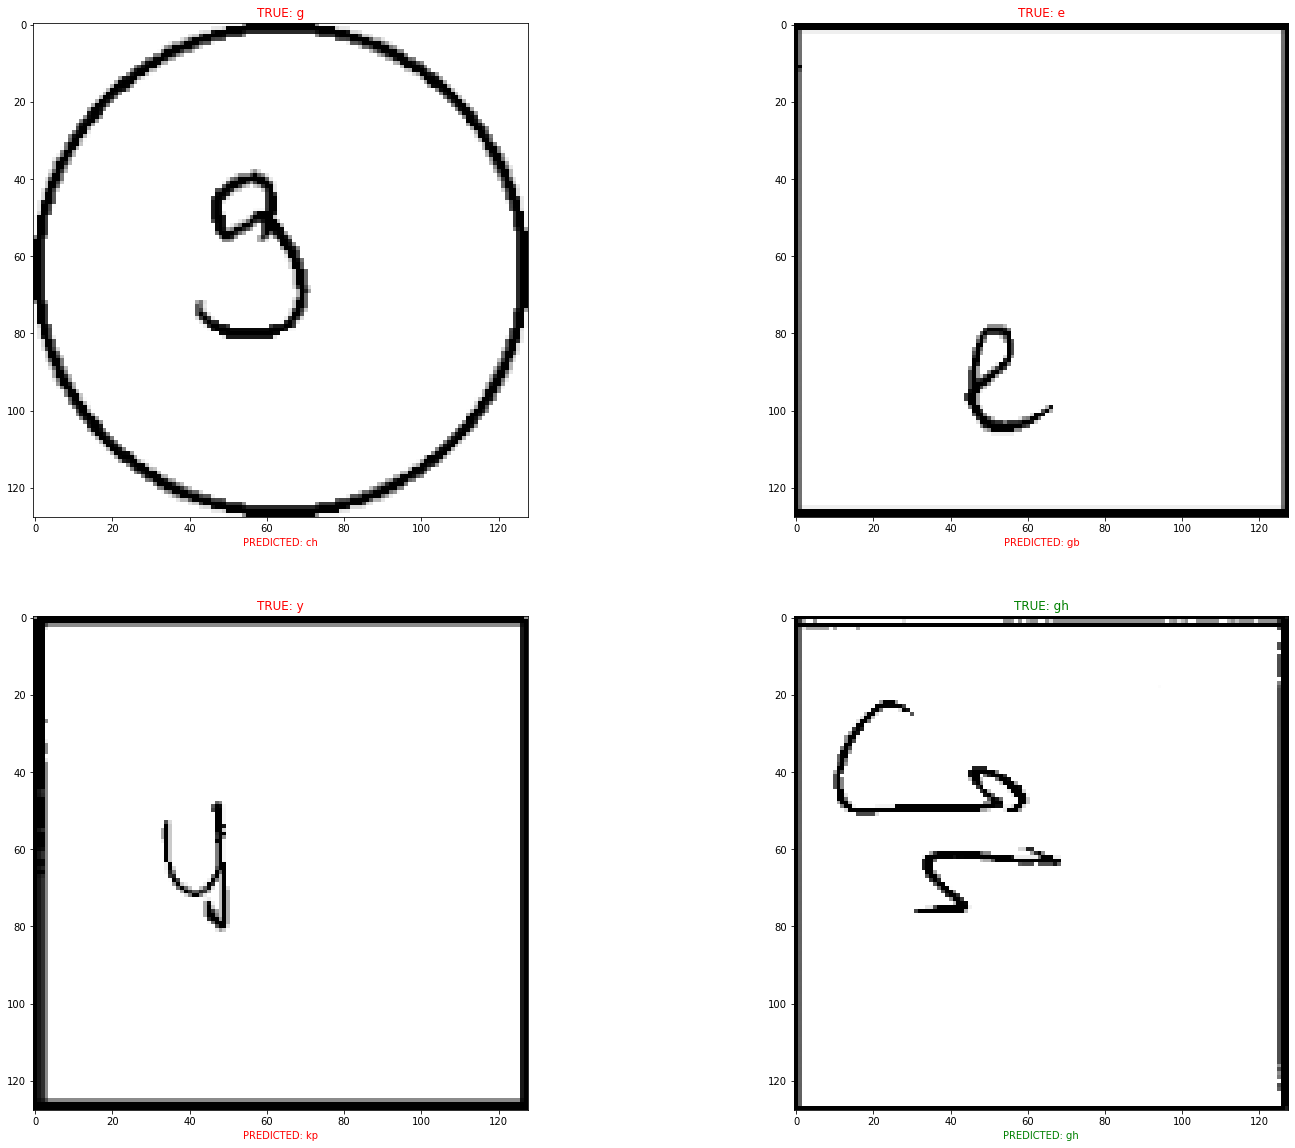

In [42]:
#Now let’s let the model if it recognize flowers properly
categories = np.sort(os.listdir(dataset))
fig, ax = plt.subplots(2,2, figsize=(25, 20))

for i in range(2):
    for j in range(2):
        k = int(np.random.random_sample() * len(X_test))
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(model.predict(X_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')

In [39]:
history.history??

<function matplotlib.pyplot.show(close=None, block=None)>

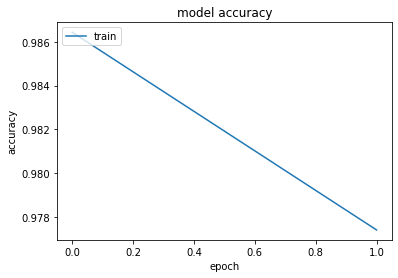

In [41]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show                                                                                                                                                                                             